In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
# load data
data=read_csv('train.csv')

In [80]:
# split data into X and y
y=data.target
X=data.drop(['id','target'],axis=1)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


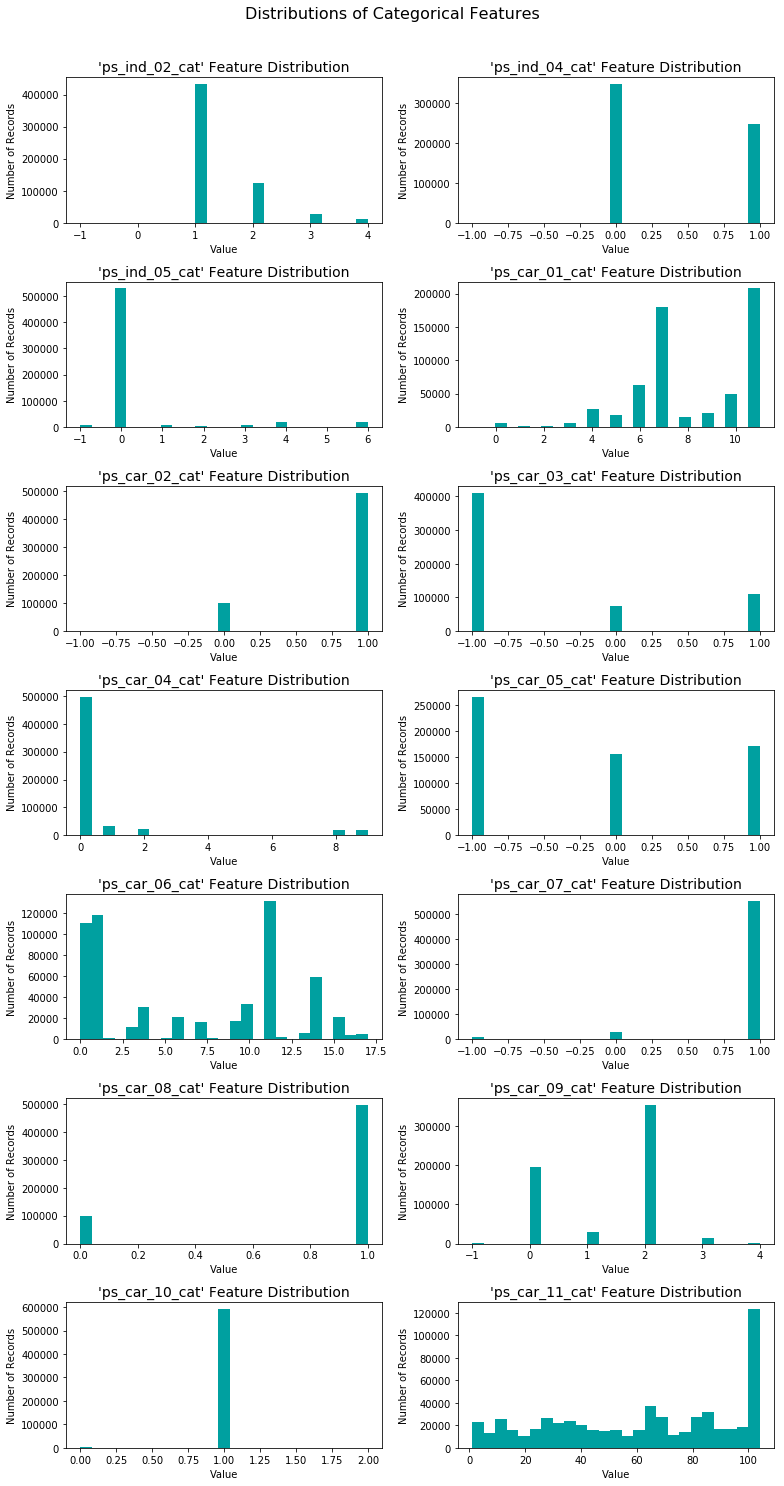

In [81]:
#X = X.replace(-1,np.NaN)
X_cat = [col for col in X.columns if '_cat' in col]
print (X_cat)
fig = plt.figure(figsize = (11,20))
for i, feature in enumerate(X_cat):
    ax = fig.add_subplot(7, 2, i+1)
    ax.hist(X[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
fig.suptitle("Distributions of Categorical Features", fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()

In [66]:
# split data into training and testing sets
seed=7
test_size=0.33
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [49]:
# fit model to training data
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
# make predictions for test data
y_pred=model.predict(X_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

Accuracy: 96.35%
